In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [3]:
#Q1 b
def inputfun(x):
    return 1-np.exp(-2*x)
    #return np.exp(1-x**2) #test function for negative w
def relax(x,func):
    e = 1
    c = 0
    while e>10**(-6):
        c+=1
        x_old = x
        x = func(x)
        e = abs(x_old - x)
    print(c)
    return x

In [5]:
relax(1,inputfun)

14


0.7968126311118457

In [6]:
#Q1c
def overrelax(x,func,w):
    e = 1
    c = 0
    while (abs(e)>10**(-6)):
        c+=1
        x_old = x
        x = (1+w)*func(x_old)-w*x_old
        e = x - x_old
        print(x)
    print(c)
    return x

In [8]:
overrelax(1,inputfun,0.5)

0.796997075145081
0.7968323724281932
0.7968143476015649
0.7968123729832619
0.7968121566399141
5


0.7968121566399141

In [9]:
def bisect(fun,rang):
    x1 = rang[0]
    x2 = rang[1]
    #check if the input is correct
    if fun(x1)*fun(x2) > 0:
        print("Error")
        return 0
    else:
        while abs(fun(x1))>10**(-6):
            x3 = (x1+x2)/2
            if fun(x3)*fun(x2)>0:
                x2 = x3
            else:
                x1 = x3
        return x1

def equation(x):
    return 5*np.exp(-x)+x-5

In [10]:
bisect(equation,[0.5,7])

4.965113580226898

In [11]:
#Q3 tests

In [12]:
#utility functions
def forward_difference(func,x,h):
    f_prime = (func(x+h) - func(x))/h
    return f_prime 
def central_difference(func,x,h):
    f_prime = ((func(x+h) - func(x-h))/(2*h))
    return f_prime 


In [17]:
#test funcdtion for 1D gradient descend
def test(x):
    return (x-2)**2

In [18]:
def gradient_descend(fun,x0):
    h = 0.01
    xp = 1
    while abs(xp)>10**(-6):
        xp = central_difference(test,x0,h)
        x0 = x0 - xp*h
    return x0
    

In [19]:
gradient_descend(test,100)

2.0000004811935037

In [21]:
#test function for 2d GD
def test1(x,y):
    return (x-2)**2+(y-2)**2
 
def gradient_descend(fun,x,y):
    h = 0.01
    xp = 1
    yp = 1
    res = []
    while abs(xp)>10**(-6):
        xp = central_difference(lambda x:fun(x,y),x,h)
        yp = central_difference(lambda y:fun(x,y),y,h)
        x = x - xp*h
        y = y - yp*h
        res.append(fun(x,y))
    return x,y,res
    

In [24]:
x,y,res = gradient_descend(test1,-100,100)
print(x,y)

1.9999995189989725 2.000000462138241


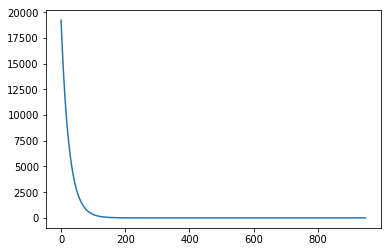

In [25]:
plt.plot(res)

In [26]:
#Q3
data = np.loadtxt("smf_cosmos.dat")

In [27]:
#get data
y = data[:,1]
logM = data[:,0]
M= 10**logM
yer = data[:,2]

In [28]:
# Define Schester function, cost function, and the inputfunction when doing GD
def sche(phi,M_s,a,M):
    return phi*np.log(10)*np.exp(-(10**M)/(10**M_s))*((10**M/10**M_s)**(a+1))
def cost_fun(phi, M_s, a, M, out):
    return sum((out-sche(phi,M_s,a,M))**2/sche(phi,M_s,a,M))
def inputfun(x1,x2,x3):
    return cost_fun(x1,x2,x3,logM,y)


In [30]:
def gradient_descend(fun,x,y,z,tol):
    c = 0
    maxite = 500000
    xp = 1
    yp = 1
    zp = 1
    step = 1
    h = 0.0001
    hx = 0.0001
    hy = 0.0001
    hz = 0.0001
    x2=x+h; 
    y2=y+h;
    z2=z+h;
    chi2 = []
    while step>tol and c<maxite:
        xp = forward_difference(lambda x:fun(x,y,z),x,hx)
        yp = forward_difference(lambda y:fun(x,y,z),y,hy)
        zp = forward_difference(lambda z:fun(x,y,z),z,hz)
        x3 = x2 - h*xp
        y3 = y2 - h*yp
        z3 = z2 - h*zp
        hx = x2-x
        hy = y2-y
        hz = z2-z
        x = x2
        x2 = x3 
        y = y2
        y2 = y3
        z = z2
        z2 = z3
        chi2.append(fun(x,y,z))
        step = max(abs(hx),abs(hy),abs(hz));
        c+=1
    print("The local minimum was found in",c,'iterations.')
    return x,y,z,chi2
    

In [31]:
#test for different initial guesses 
phi,Ms,a,chi2 = gradient_descend(inputfun,0.5,10.88,-0.97,10**(-6))
#phi,Ms,a,chi22 = gradient_descend(inputfun,np.exp(-3.5),11.5,-0.5,10**(-6))
#phi1,Ms1,a1,chi21 = gradient_descend(inputfun,0.0032,10.9,-0.97,10**(-6))

The local minimum was found in 9505 iterations.


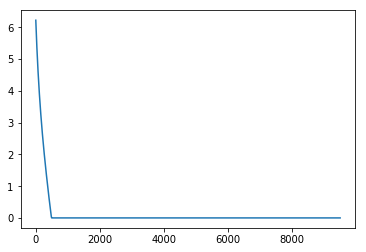

In [33]:
plt.plot(chi2)

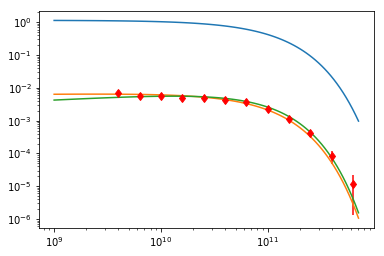

In [130]:
X = np.linspace(9,11.85,100)
plt.loglog(10**X,sche(0.5,11,-1,X))
plt.loglog(10**X,sche(phi1,Ms1,a1, X))
plt.loglog(10**X,sche(phi,Ms,a, X))
#plt.loglog(10**X,sche(0.0021863316107612477,11.186536039022329,-1.0485449733838006, X))

for i in range(0,len(M)):
    plt.errorbar(M[i], y[i], yer[i], marker='d', color="r")

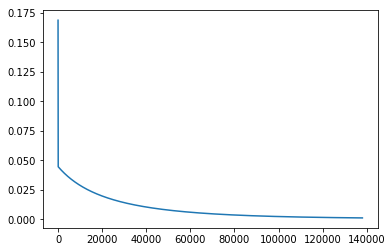

In [84]:
plt.plot(chi)